# Chapter 7: Derivatives

- randomly changing and searching for optimal weights and biases did not prove fruitful for one main reason: 
- the number of possible combinations of weights and biases is astronomical
- in order to know how to adjust weights and biases, we want to first understand their impact on the loss
---
- the loss function we’re using, Softmax loss, doesn’t have weights or biases as an input 
- the input to the cross-entropy loss function is the output of the Softmax activation function
- the weights and biases are what influence the model's output distribution, which therefore, obviously have an affect on the output of the Softmax activation function, which has an affect on the cross-entropy loss function's output
---
- let’s start with a simple function: 

In [3]:
def f(x):
    return 2*x

- now let’s create some code around this to visualize the data:

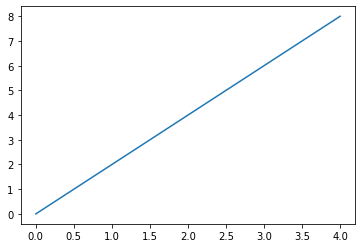

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def f(x): 
    return 2*x

x = np.array(range(5))
y = f(x)

plt.plot(x, y)
plt.show()

- this is a standard linear equation:  $f(x) = 2x$
- the slope of a line is the change in $y$ over the change in $x$
- for linear equations (like our example), just pick any two points on the graph:

In [5]:
print((y[1]-y[0]) / (x[1]-x[0]))

2.0


- the slope of this line is 2, which means $x$ has an impact of 2 on $y$
- we can calculate the slope for any linear function using this formula
- let's try calculating the slope for $f(x)=2x^2$:


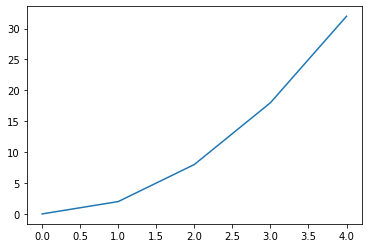

In [6]:
def f(x):
    return 2*x**2

x = np.array(range(5))
y = f(x)

plt.plot(x, y)
plt.show()

- this line is not linear, so we need a different approach
- for measuring the impact that $x$ has on $y$ for nonlinear functions, Calculus proposes that we measure the slope of the **tangent line** at $x$, which gives us the **instantaneous slope** (the **derivative**)
- the tangent line is created by two points that are “infinitely close” on some continuous curve 
---
- as an example, we can approximate a derivative with a very small delta added to $x$, such as 0.0001
- this number is a common choice as it does not introduce too large an error (when estimating the derivative)

In [7]:
p2_delta = 0.0001

x1 = 1
x2 = x1 + p2_delta

y1 = f(x1)
y2 = f(x2)

apx_derivative = (y2-y1)/(x2-x1)  #apx short for approximate
print(apx_derivative)

4.0001999999987845


- let's visualize the tangent lines and how they change depending on where we calculate them
- to begin, we’ll make the graph of this function more granular using `np.arange()`, which accepts start, stop, and step parameters, allowing us to plot with smaller steps

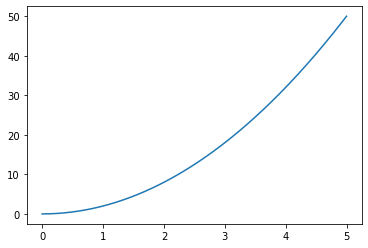

In [8]:
def f(x):
    return 2*x**2

# np.arange(start, stop, step) to give us smoother line
x = np.arange(0,5,0.001)
y = f(x)

plt.plot(x, y)

p2_delta = 0.0001
x1 = 2
x2 = x1+p2_delta

y1 = f(x1)
y2 = f(x2)

apx_derivative = (y2-y1)/(x2-x1)
plt.show()

- to draw these tangent lines, let's calculate the function for the tangent line at a point
- the slope remains unchanged, but you can adjust the line up or down using the bias

(2, 8) (2.0001, 8.000800020000002)
Approximate derivative for f(x) where x = 2 is 8.000199999998785


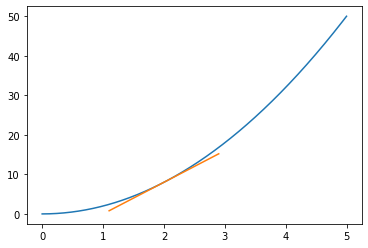

In [11]:
def f(x):
    return 2*x**2

# np.arange(start, stop, step) to give us smoother line
x = np.arange(0,5,0.001)
y = f(x)

plt.plot(x, y)


p2_delta = 0.0001
x1 = 2 # slope of tangent line at x=2
x2 = x1+p2_delta

y1 = f(x1)
y2 = f(x2)

print((x1, y1), (x2, y2))
apx_derivative = (y2-y1)/(x2-x1)
b = y2-(apx_derivative*x2)

def tang_line(x):
    return (apx_derivative*x) + b


# +/- 0.9 to draw the tangent line on our graph
to_plot = [x1-0.9, x1, x1+0.9]
plt.plot([i for i in to_plot], [tang_line(i) for i in to_plot])

print(f"Approximate derivative for f(x) where x = {x1} is {apx_derivative}")

plt.show()

- the orange line is the approximate tangent line at $x=2$ for $f(x) = 2x^2$

### Neural Network Applications
- we care about the slope of the tangent line because it informs us about the impact that $x$ has on this function at a particular point
- we will use this concept to determine the impact of a specific weight or bias on the overall loss function
---
- we can continue the previous code to see the tangent line for various inputs $x$:

(0, 0) (0.0001, 2e-08)
Approximate derivative for f(x) where x = 0 is 0.00019999999999999998
(1, 2) (1.0001, 2.00040002)
Approximate derivative for f(x) where x = 1 is 4.0001999999987845
(2, 8) (2.0001, 8.000800020000002)
Approximate derivative for f(x) where x = 2 is 8.000199999998785
(3, 18) (3.0001, 18.001200020000002)
Approximate derivative for f(x) where x = 3 is 12.000199999998785
(4, 32) (4.0001, 32.00160002)
Approximate derivative for f(x) where x = 4 is 16.000200000016548


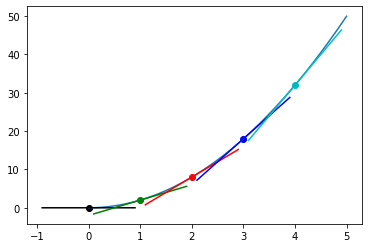

In [12]:
def f(x):
    return 2*x**2

# np.arange(start, stop, step) to give us a smoother curve
x = np.array(np.arange(0,5,0.001))
y = f(x)

plt.plot(x, y)

colors = ["k","g","r","b","c"]

def apx_tang_line(x, apx_derivative):
    return (apx_derivative*x) + b

for i in range(5):
    p2_delta = 0.0001
    x1 = i
    x2 = x1+p2_delta

    y1 = f(x1)
    y2 = f(x2)

    print((x1, y1), (x2, y2))
    apx_derivative = (y2-y1)/(x2-x1)
    b = y2-(apx_derivative*x2)

    to_plot = [x1-0.9, x1, x1+0.9]

    plt.scatter(x1, y1, c=colors[i])
    plt.plot([point for point in to_plot], [apx_tang_line(point, apx_derivative) for point in to_plot], c=colors[i])


    print(f"Approximate derivative for f(x) where x = {x1} is {apx_derivative}")

plt.show()

- the problem is that the actual function employed in our neural network is not nearly as simple as $f(x)=2x^2$
- the loss function contains all the layers, weights, and biases (it’s an absolutely massive function)
- calculating derivatives using numerical differentiation requires that we make two forward passes through our model per weight and bias (as we had to run the function twice to calculate the slope of the tangent line)
---
- as a reminder, since we’ve covered many terms in a short time, the derivative is the slope of the tangent line for a function (the loss function in our case) at the point of our parameters (weights and biases in our case)
---
- the **Analytical Derivative** is the actual solution to the derivative ($f(x)=2x^2$ >>> $f'(x)=4x$)
- with neural networks, however, we are going to be using the **Partial Derivative**